# Test 1 A

UAI502 Computational Intelligence



##Task 1 - data preprocessing (10 points)
Perform the following subtasks (each in a separate cell):
1.	Load the "Sleep_health_and_lifestyle_dataset.csv" dataset from e-learning into the Colab notebook as CSV. Study its content and structure. In Pandas, you can use print(df.info()), where df are imported data.
2.	On categorical columns, apply one-hot encoding and convert the data to a numpy array.
3.	On numerical columns, perform linear normalization to the range (0, 1)
4.	Sample the dataset to 60 samples for every output label value.
5.	Split the dataset into input and output (label) subsets - the label is the last column in the original dataset.
6.	Create a scatterplot of normalized values of Quality of Sleep (Y-axis) and Age (X-axis)


In [69]:
#1. load data and study content
import numpy as np
import matplotlib.pyplot as plt
import math as m
import pandas as pd

df = pd.read_csv("/content/Sleep_health_and_lifestyle.csv")
df.head()

,Gender,Age,Sleep Duration,BMI Category,Heart Rate,Sleep Disorder
0,Male,27,6.1,Overweight,77,None
1,Male,28,6.2,Normal,75,None
2,Male,28,6.2,Normal,75,None
3,Male,28,5.9,Obese,85,Sleep Apnea
4,Male,28,5.9,Obese,85,Sleep Apnea


In [5]:
df.shape

(374, 6)

In [7]:
df.columns

Index(['Gender', 'Age', 'Sleep Duration', 'BMI Category', 'Heart Rate',
       'Sleep Disorder'],
      dtype='object')

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          374 non-null    object 
 1   Age             374 non-null    int64  
 2   Sleep Duration  374 non-null    float64
 3   BMI Category    374 non-null    object 
 4   Heart Rate      374 non-null    int64  
 5   Sleep Disorder  374 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 17.7+ KB
None


In [20]:
# Encode Categorical columns

df_cat_encoded = pd.get_dummies(df[['Gender','BMI Category', 'Sleep Disorder']])
cat_enc_arr = np.array(df_cat_encoded)
cat_enc_arr


array([[0, 1, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [55]:
#Sample the dataset
df_sample = df.iloc[:60, :]
df_sample

,Gender,Age,Sleep Duration,BMI Category,Heart Rate,Sleep Disorder
0,Male,27,6.1,Overweight,77,None
1,Male,28,6.2,Normal,75,None
2,Male,28,6.2,Normal,75,None
3,Male,28,5.9,Obese,85,Sleep Apnea
4,Male,28,5.9,Obese,85,Sleep Apnea
5,Male,28,5.9,Obese,85,Insomnia
6,Male,29,6.3,Obese,82,Insomnia
7,Male,29,7.8,Normal,70,None
8,Male,29,7.8,Normal,70,None
9,Male,29,7.8,Normal,70,None


In [50]:
#Normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_num = df[['Age', 'Sleep Duration', 'Heart Rate', ]]

df_num_arr = np.array(df_num)

mean = np.mean(df_num_arr, axis = 0)
std = np.std(df_num_arr, axis = 0)

df_norm = (np.array(df_num_arr) - mean)/std
df_norm


array([[-1.75309569, -1.29888693,  1.6547187 ],
       [-1.63764266, -1.17303623,  1.17047394],
       [-1.63764266, -1.17303623,  1.17047394],
       ...,
       [ 1.94140144,  1.21812712, -0.52438269],
       [ 1.94140144,  1.21812712, -0.52438269],
       [ 1.94140144,  1.21812712, -0.52438269]])

In [64]:
# Split the dataset
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(df.iloc[:, :5], df.iloc[:, -1], test_size= 0.2)

print(x_train)
print(x_test)

     Gender  Age  Sleep Duration BMI Category  Heart Rate
174    Male   41             7.6       Normal          70
351  Female   57             8.1   Overweight          68
15     Male   29             6.0       Normal          70
334  Female   54             8.4       Normal          65
154    Male   39             7.2       Normal          68
..      ...  ...             ...          ...         ...
318  Female   53             8.4       Normal          65
361  Female   59             8.2   Overweight          68
126    Male   38             7.3       Normal          68
140  Female   38             7.1       Normal          68
313  Female   52             8.4       Normal          65

[299 rows x 5 columns]
174           None
351    Sleep Apnea
15            None
334           None
154           None
          ...     
318           None
361    Sleep Apnea
126           None
140           None
313           None
Name: Sleep Disorder, Length: 299, dtype: object


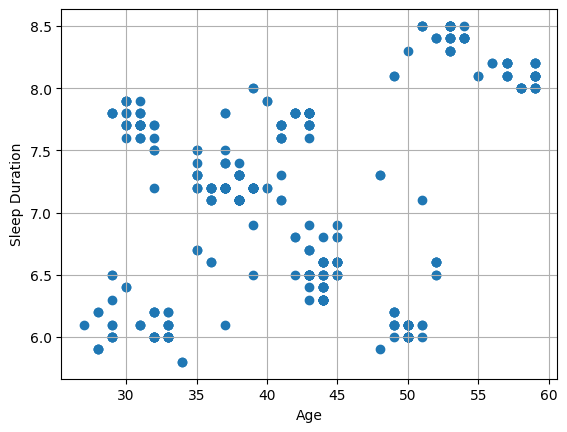

In [72]:
# Scatter plot


y = df_num['Sleep Duration']
x = df_num['Age']

plt.scatter(x, y)
plt.xlabel ("Age")
plt.ylabel("Sleep Duration")
plt.grid()

##Task 2 - data visualization (5 points)
Plot the 3D graph of derivation of the function $$f(x)=0.5*x^{2}-log(x)$$ according the $x$ variable for $x\in <0.1,2>$.




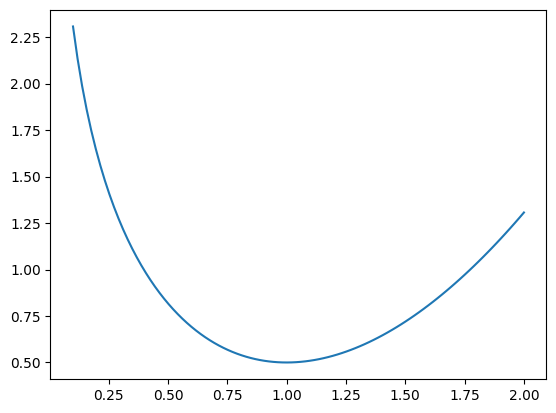

In [79]:

def derivative(x):
  y = 0.5 * x*x - m.log(x)
  return y
x = np.linspace(0.1,2, 100)

fx = []
for i in x:
  fx.append(derivative(i))

plt.plot(x, fx)



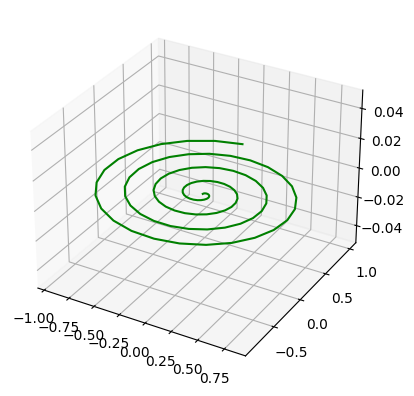

In [84]:
#3D Projection

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot3D(x, y, 'green')


## Task 3 - neural network model (15 points)
Perform the following subtasks (each in a separate cell):
1.	Use keras to load the CIFAR10 dataset: (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data(). The dataset contains small RGB images classified into ten categories.
2.	Reduce the training and testing datasets to only three output labels (0,1,2).
3.	Create a convolution network with two 2D convolution layers with relu activation, 5 and 3 filters, respectively, and kernel size 3x3. The Flatten and Dense (with softmax activation) layers will follow these layers for classification. The first layer of the model will be the layer.
4.	Train the model with optimizer Adam, loss function sparse_categorical_crossentropy, and accuracy metrics for eight epochs. Batch size set to 20, validation dataset size set to 0.2.
5.	Evaluate the model on the test dataset.
6.	Visualize the training process (only training and validation loss values) with Matplotlib.


In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D


In [93]:
# 1. Load Dataset
 (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [100]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [107]:
# Reduce dataset to 3 output labels

x_train.

In [117]:
# Create convolutional network

model = Sequential()
model.add(Conv2D(5, (3,3), activation = 'relu', input_shape = (500, 960, 320)))
model.add(MaxPooling2D())
model.add(Conv2D(3, (3,3), activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 498, 958, 5)       14405     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 249, 479, 5)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 247, 477, 3)       138       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 123, 238, 3)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 87822)             0         
                                                                 
 dense_5 (Dense)             (None, 3)                

In [ ]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics ='accuracy')